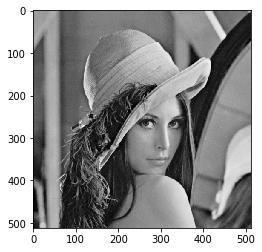

In [0]:
import cv2 
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt 
from PIL import Image
import scipy.misc
import matplotlib
from scipy import ndimage
from scipy import signal
import signal

#Problem1
#Reading of image in grayscale format

img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)          #grayscale image 
plt.imshow(img, cmap='gray')
plt.show()

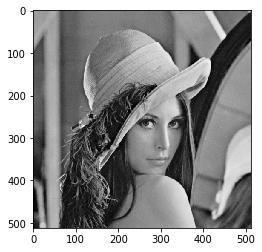

Pixel intensity: 0.592156862745098


In [0]:
#Normalizing the image with intensity between 0-1

image = img/255.0                #normalize values (bet 0-1)
plt.imshow(image, cmap='gray')
plt.show()
pixel = image[480,300]          #checking pixel intensity (bet 0-1)
print ('Pixel intensity:',pixel)

Original image size :  (512, 512)


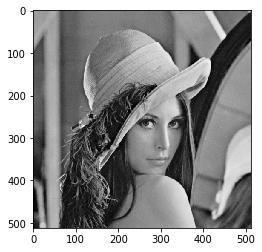

Downsampled image size :  (256, 256)


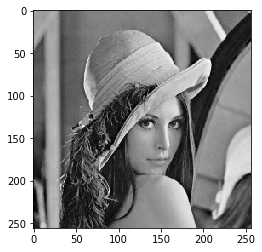

In [0]:
#Performing downsampling on the original image

width1,height1=image.shape
print("Original image size : ",image.shape)
plt.imshow(image, cmap='gray')        #original image
plt.show()

def downsample(width,height):
    downsampled1 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * image.shape[0] / width )
            new_height = int( H * image.shape[1] / height )
            downsampled1[W][H] = image[new_width][new_height]

    print("Downsampled image size : " , downsampled1.shape)    #downsampled1 image     
    return downsampled1
    
downsampled1=downsample(int(width1/2),int(height1/2))
plt.imshow(downsampled1, cmap='gray')        
plt.show()


Original image size :  (256, 256)


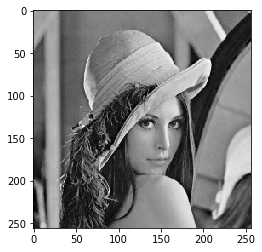

Downsampled image size :  (128, 128)


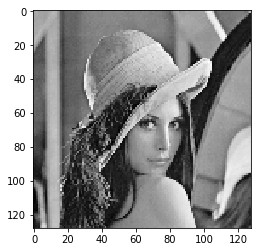

In [0]:
#Performing downsampling on the previously downsampled image

width1,height1=downsampled1.shape
print("Original image size : ",downsampled1.shape)
plt.imshow(downsampled1, cmap='gray')        #downsmapled1 image
plt.show()

def downsample(width,height):
    downsampled2 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * downsampled1.shape[0] / width )
            new_height = int( H * downsampled1.shape[1] / height )
            downsampled2[W][H] = downsampled1[new_width][new_height]

    print("Downsampled image size : " , downsampled2.shape)    #downsampled2 image     
    return downsampled2
    
downsampled2=downsample(int(width1/2),int(height1/2))
plt.imshow(downsampled2, cmap='gray')        
plt.show()

Original image size: (128, 128)


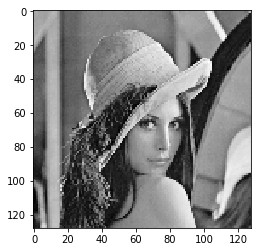

Upsampled image size :  (256, 256)


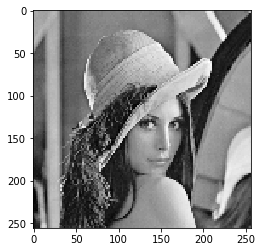

In [0]:
#Performing upsampling on the downsampled image

width1,height1=downsampled2.shape
print("Original image size:",downsampled2.shape)
plt.imshow(downsampled2, cmap='gray')        #downsmapled2 image
plt.show()

def upsample(width,height):
    upsampled1 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * downsampled2.shape[0] / width )
            new_height = int( H * downsampled2.shape[1] / height )
            upsampled1[W][H] = downsampled2[new_width][new_height]

    print("Upsampled image size : " , upsampled1.shape)    #upsampled1 image    
    return upsampled1
    
upsampled1=upsample(int(width1*2),int(height1*2))
plt.imshow(upsampled1, cmap='gray')        
plt.show()


Original image size: (256, 256)


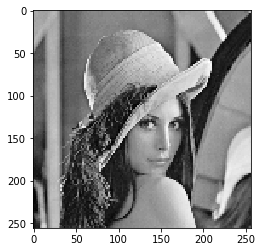

Upsampled image size :  (512, 512)


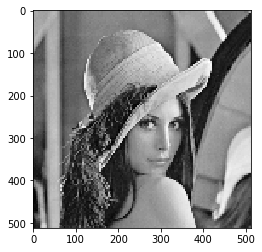

In [0]:
#Performing upsampling on the upsampled image

width1,height1=upsampled1.shape
print("Original image size:",upsampled1.shape)
plt.imshow(upsampled1, cmap='gray')        #upsmapled1 image
plt.show()

def upsample(width,height):
    upsampled2 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * upsampled1.shape[0] / width )
            new_height = int( H * upsampled1.shape[1] / height )
            upsampled2[W][H] = upsampled1[new_width][new_height]

    print("Upsampled image size : " , upsampled2.shape)    #upsampled2 image     
    return upsampled2
    
upsampled2=upsample(int(width1*2),int(height1*2))
plt.imshow(upsampled2, cmap='gray')        
plt.show()


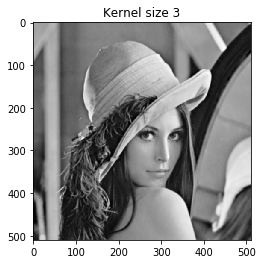

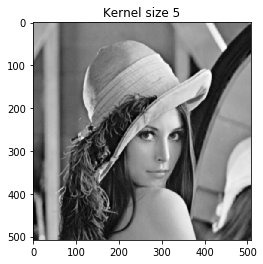

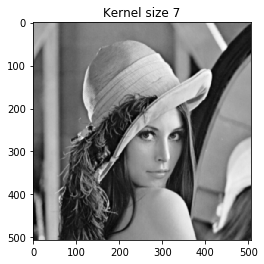

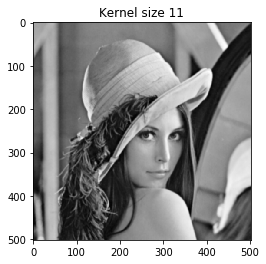

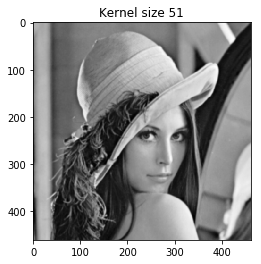

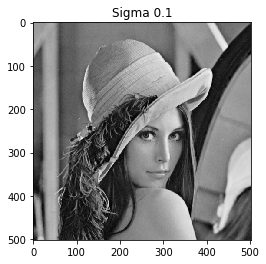

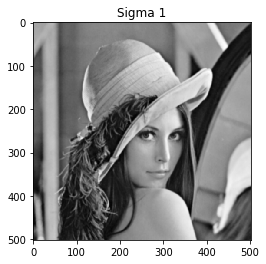

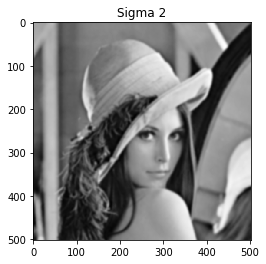

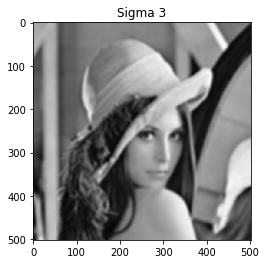

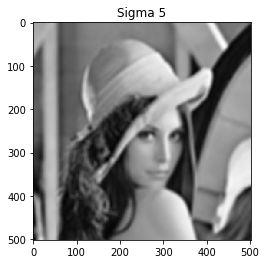

In [0]:
#Problem2
from scipy import signal

def myGaussianSmoothing(image, kernel_size, sigma):        #Gaussian smoothing function
    image = np.asarray(image)
    gaussian_filter = np.zeros((kernel_size, kernel_size), np.float32)
    m = kernel_size//2
    n = kernel_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    gauss_blur = signal.convolve2d(image, gaussian_filter, 'valid')    
    return gauss_blur

plt.title("Kernel size 3")
I_smooth=myGaussianSmoothing(image,3,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Kernel size 5")
I_smooth=myGaussianSmoothing(image,5,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Kernel size 7")
I_smooth=myGaussianSmoothing(image,7,1)    #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Kernel size 11")
I_smooth=myGaussianSmoothing(image,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Kernel size 51")
I_smooth=myGaussianSmoothing(image,51,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Sigma 0.1")
I_smooth=myGaussianSmoothing(image,11,0.1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Sigma 1")
I_smooth=myGaussianSmoothing(image,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Sigma 2")
I_smooth=myGaussianSmoothing(image,11,2)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Sigma 3")
I_smooth=myGaussianSmoothing(image,11,3)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

plt.title("Sigma 5")
I_smooth=myGaussianSmoothing(image,11,5)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()

Original image size: (128, 128)


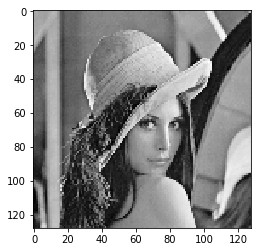

Upsampled image size :  (256, 256)


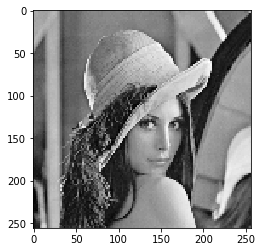

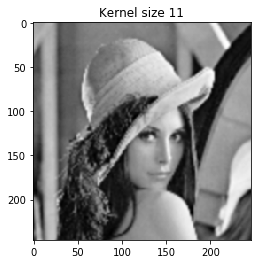

In [0]:
#Problem3
#Performing upsampling on the downsampled image

width1,height1=downsampled2.shape
print("Original image size:",downsampled2.shape)
plt.imshow(downsampled2, cmap='gray')        #downsmapled2 image
plt.show()

def upsample(width,height):
    upsampled1 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * downsampled2.shape[0] / width )
            new_height = int( H * downsampled2.shape[1] / height )
            upsampled1[W][H] = downsampled2[new_width][new_height]

    print("Upsampled image size : " , upsampled1.shape)    #upsampled1 image    
    return upsampled1
    
upsampled1=upsample(int(width1*2),int(height1*2))
plt.imshow(upsampled1, cmap='gray')        
plt.show()

plt.title("Kernel size 11")
I_smooth=myGaussianSmoothing(upsampled1,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')          #image after performing gaussian smoothing
plt.show()


Original image size: (256, 256)


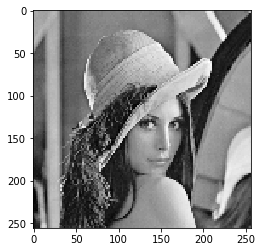

Upsampled image size :  (512, 512)


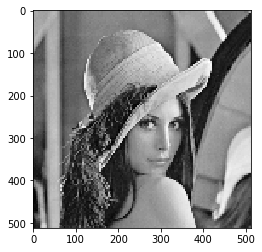

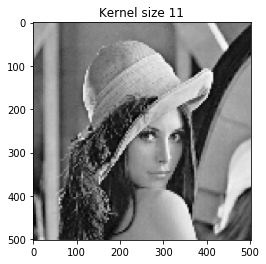

In [0]:
#Performing upsampling on the upsampled image

width1,height1=upsampled1.shape
print("Original image size:",upsampled1.shape)
plt.imshow(upsampled1, cmap='gray')        #upsmapled1 image
plt.show()

def upsample(width,height):
    upsampled2 = np.zeros(shape=(width,height))

    for W in range(width):
        for H in range(height):
            new_width = int( W * upsampled1.shape[0] / width )
            new_height = int( H * upsampled1.shape[1] / height )
            upsampled2[W][H] = upsampled1[new_width][new_height]

    print("Upsampled image size : " , upsampled2.shape)    #upsampled2 image     
    return upsampled2
    
upsampled2=upsample(int(width1*2),int(height1*2))
plt.imshow(upsampled2, cmap='gray')        
plt.show()

#gaussian smoothing on upsampled image
plt.title("Kernel size 11")
I_smooth=myGaussianSmoothing(upsampled2,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')               #image after performing gaussian smoothing
plt.show()


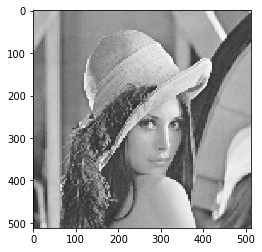

In [0]:
#Perfroming median filtering on upsampled image

def median_filter(upsampled2, kernel_size):
    temp = []
    indexer = kernel_size // 2
    for i in range(len(upsampled2)):

        for j in range(len(upsampled2[0])):

            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(upsampled2) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(upsampled2[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(upsampled2[i + z - indexer][j + k - indexer])

            temp.sort()
            upsampled2[i][j] = temp[len(temp) // 2]
            temp = []
    return upsampled2

arr = np.array(upsampled2)
med_filter = median_filter(arr, 3) 
img = Image.fromarray(med_filter)
plt.imshow(img, cmap='gray')        
plt.show()


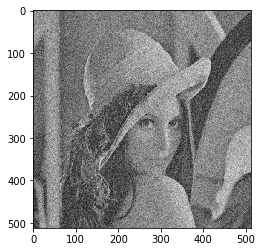

In [0]:
#Problem4
#Adding noise to original image
def noisy(image):
    row,col= image.shape
    gauss = np.random.normal(0,0.1,(row,col))       #adding noise to the original image
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy
      
I_noisy=noisy(image)
plt.imshow(I_noisy, cmap='gray')                 #noisy image
plt.show()

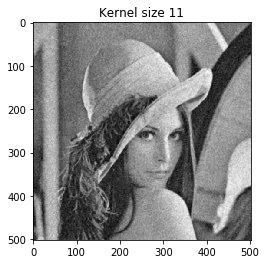

In [0]:
#Gaussian smoothing on image with added noise
plt.title("Kernel size 11")
I_smooth=myGaussianSmoothing(I_noisy,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')               #image after performing gaussian smoothing
plt.show()

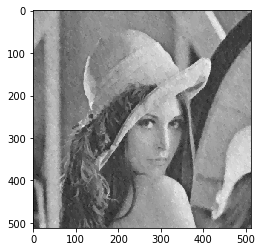

In [0]:
#median filter on image with added noise
arr = np.array(I_noisy)
med_filter = median_filter(arr, 3) 
img = Image.fromarray(med_filter)
plt.imshow(img, cmap='gray')        
plt.show()


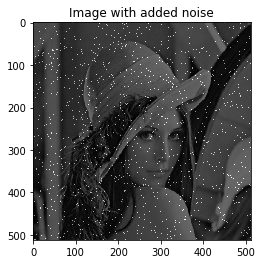

In [0]:
#setting the noise to value 1 everywhere where the noise was > 0:2 and 0 otherwise

row,col= image.shape
gauss = np.random.normal(0,0.1,(row,col))       #adding noise to the original image
gauss = gauss.reshape(row,col)

result = (np.where(gauss>0.2,1,0))
plt.title("Image with added noise")
noisy=image+result
plt.imshow(noisy, cmap='gray')                 #noisy image
plt.show()


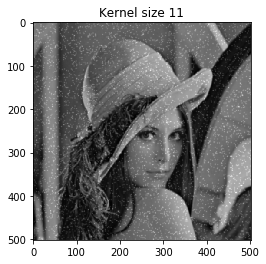

In [0]:
#Gaussian smoothing on image with added noise
plt.title("Kernel size 11")
I_smooth=myGaussianSmoothing(noisy,11,1)   #parameters: image, kernel_size, scaling parameter(sigma)
plt.imshow(I_smooth, cmap='gray')               #image after performing gaussian smoothing
plt.show()

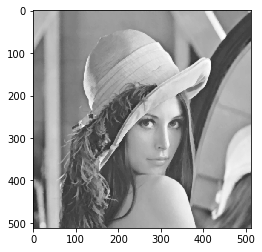

In [0]:
#median filter on image with added noise
arr = np.array(noisy)
med_filter = median_filter(arr, 3) 
img = Image.fromarray(med_filter)
plt.imshow(img, cmap='gray')        
plt.show()

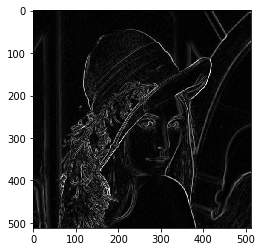

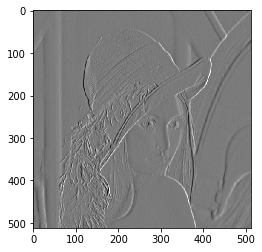

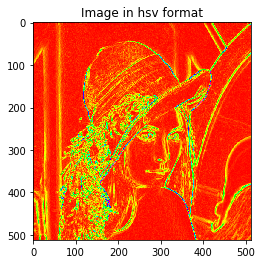

In [0]:
#Problem5
#Sobel filter

from scipy import ndimage
from scipy import signal
import signal
import math 

def mySobelFilter(image):
     
    image = image.astype(np.float)
    width, height = image.shape
    k_size=3
    img = image
     
    assert(k_size == 3 or k_size == 5);
     
    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)
     
    gx = scipy.signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = scipy.signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
 
    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)   
    
    return g,gx

sobel_img,a=mySobelFilter(image)
plt.imshow(sobel_img, cmap='gray')                 
plt.show()

plt.imshow(a, cmap='gray')                 
plt.show()

plt.title("Image in hsv format")
plt.imshow(sobel_img, cmap='hsv')                 
plt.show()

